# **Explore Data**

This notebook contains code for exploring a smaller version of the dataset locally

This project requires Python 3.7 or above:

In [2]:
import sys
assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [3]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

## Download the Data

In [4]:
import os
import pandas as pd
from pathlib import Path

In [5]:
!export PYSPARK_SUBMIT_ARGS='--packages io.delta:delta-core_2.12:1.0.0 pyspark-shell'

# set up the spark session
import pyspark
from delta import *

builder = pyspark.sql.SparkSession.builder.appName("MyApp") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog")

spark = configure_spark_with_delta_pip(builder).getOrCreate()

In [6]:
from pyspark.sql import functions as F

def load_nfl_delta_dataset(dataset_name: str) -> pd.DataFrame:
    '''
    Loads the dataset from the file system with Spark and converts it to a Pandas DataFrame.
    '''
    dataset_path = f"datasets/{dataset_name}"
    if not Path(dataset_path).exists():
        raise FileNotFoundError(f"Dataset {dataset_name} not found at {dataset_path}")
    return spark.read.format("delta").load(dataset_path)\
        .toPandas()

dataset_name = 'gold-set-ne-train'
nfl_df = load_nfl_delta_dataset(dataset_name)

## Take a Quick Look at the Data Structure

In [7]:
nfl_df.head()

,play_id,game_date,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,quarter_seconds_remaining,...,complete_pass_8_play_ma,tackled_for_loss_8_play_ma,run_yards_given_32_play_ma_ffill,defense_tfl_32_play_ma_ffill,pass_yards_given_32_play_ma_ffill,defense_sack_32_play_ma_ffill,defense_qb_hit_32_play_ma_ffill,defense_interception_32_play_ma_ffill,pass_given_up_32_play_ma_ffill,game_month
0,79,2009-09-14,NE,BUF,NE,home,BUF,BUF,49,892,...,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,101,2009-09-14,NE,BUF,NE,home,BUF,BUF,49,887,...,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,122,2009-09-14,NE,BUF,NE,home,BUF,BUF,46,843,...,0.00,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,9
3,146,2009-09-14,NE,BUF,NE,home,BUF,BUF,40,819,...,0.25,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,9
4,301,2009-09-14,NE,BUF,NE,home,BUF,NE,83,734,...,0.20,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,9


In [8]:
nfl_df.tail()

,play_id,game_date,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,quarter_seconds_remaining,...,complete_pass_8_play_ma,tackled_for_loss_8_play_ma,run_yards_given_32_play_ma_ffill,defense_tfl_32_play_ma_ffill,pass_yards_given_32_play_ma_ffill,defense_sack_32_play_ma_ffill,defense_qb_hit_32_play_ma_ffill,defense_interception_32_play_ma_ffill,pass_given_up_32_play_ma_ffill,game_month
9289,3831,2017-12-31,NE,NYJ,NE,home,NYJ,NE,71,319,...,0.000000,0.111111,3.909091,0.151515,4.303030,0.060606,0.151515,0.0,0.424242,12
9290,3853,2017-12-31,NE,NYJ,NE,home,NYJ,NE,71,312,...,0.000000,0.111111,3.909091,0.151515,4.090909,0.060606,0.151515,0.0,0.393939,12
9291,3904,2017-12-31,NE,NYJ,NE,home,NYJ,NE,61,280,...,0.111111,0.111111,3.666667,0.151515,4.090909,0.060606,0.151515,0.0,0.393939,12
9292,3925,2017-12-31,NE,NYJ,NE,home,NYJ,NE,58,237,...,0.111111,0.111111,3.848485,0.121212,4.090909,0.060606,0.151515,0.0,0.393939,12
9293,3946,2017-12-31,NE,NYJ,NE,home,NYJ,NE,56,195,...,0.111111,0.111111,3.848485,0.121212,4.030303,0.060606,0.151515,0.0,0.393939,12


In [9]:
nfl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9294 entries, 0 to 9293
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   play_id                                9294 non-null   int32  
 1   game_date                              9294 non-null   object 
 2   home_team                              9294 non-null   object 
 3   away_team                              9294 non-null   object 
 4   posteam                                9294 non-null   object 
 5   posteam_type                           9294 non-null   object 
 6   defteam                                9294 non-null   object 
 7   side_of_field                          9294 non-null   object 
 8   yardline_100                           9294 non-null   int32  
 9   quarter_seconds_remaining              9294 non-null   int32  
 10  half_seconds_remaining                 9286 non-null   float64
 11  game

In [10]:
nfl_df.describe()

,play_id,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,qtr,down,goal_to_go,...,sack_8_play_ma,complete_pass_8_play_ma,tackled_for_loss_8_play_ma,run_yards_given_32_play_ma_ffill,defense_tfl_32_play_ma_ffill,pass_yards_given_32_play_ma_ffill,defense_sack_32_play_ma_ffill,defense_qb_hit_32_play_ma_ffill,defense_interception_32_play_ma_ffill,pass_given_up_32_play_ma_ffill
count,9294.000000,9294.000000,9294.000000,9286.000000,9289.000000,9294.0,9294.000000,9294.000000,9281.000000,9294.000000,...,9233.000000,9233.000000,9233.000000,9291.000000,9291.000000,9292.000000,9292.000000,9292.000000,9292.000000,9292.000000
mean,2144.088982,48.829029,441.214870,863.886603,1754.101733,0.0,11.836776,2.545513,1.754768,0.075855,...,0.018579,0.281261,0.023504,4.289246,0.093461,6.743619,0.052352,0.115157,0.018721,0.601439
std,1240.862542,25.263487,267.986716,531.685412,1018.009966,0.0,6.819524,1.110307,0.802733,0.264781,...,0.046723,0.164816,0.054637,1.008216,0.054725,1.957379,0.041745,0.059339,0.027255,0.101262
min,51.000000,1.000000,0.000000,1.000000,3.000000,0.0,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1060.250000,28.000000,205.000000,392.000000,884.000000,0.0,6.000000,2.000000,1.000000,0.000000,...,0.000000,0.200000,0.000000,3.515152,0.060606,5.424242,0.030303,0.060606,0.000000,0.545455
50%,2136.000000,51.000000,435.000000,860.000000,1796.000000,0.0,12.000000,3.000000,2.000000,0.000000,...,0.000000,0.222222,0.000000,4.151515,0.090909,6.696970,0.060606,0.121212,0.000000,0.606061
75%,3169.000000,70.000000,674.000000,1317.000000,2617.000000,0.0,17.000000,4.000000,2.000000,0.000000,...,0.000000,0.333333,0.000000,5.000000,0.121212,8.000000,0.090909,0.151515,0.030303,0.666667
max,5445.000000,99.000000,900.000000,1800.000000,3600.000000,0.0,32.000000,5.000000,4.000000,1.000000,...,0.333333,1.000000,1.000000,8.500000,0.333333,13.303030,0.212121,0.500000,0.151515,0.878788


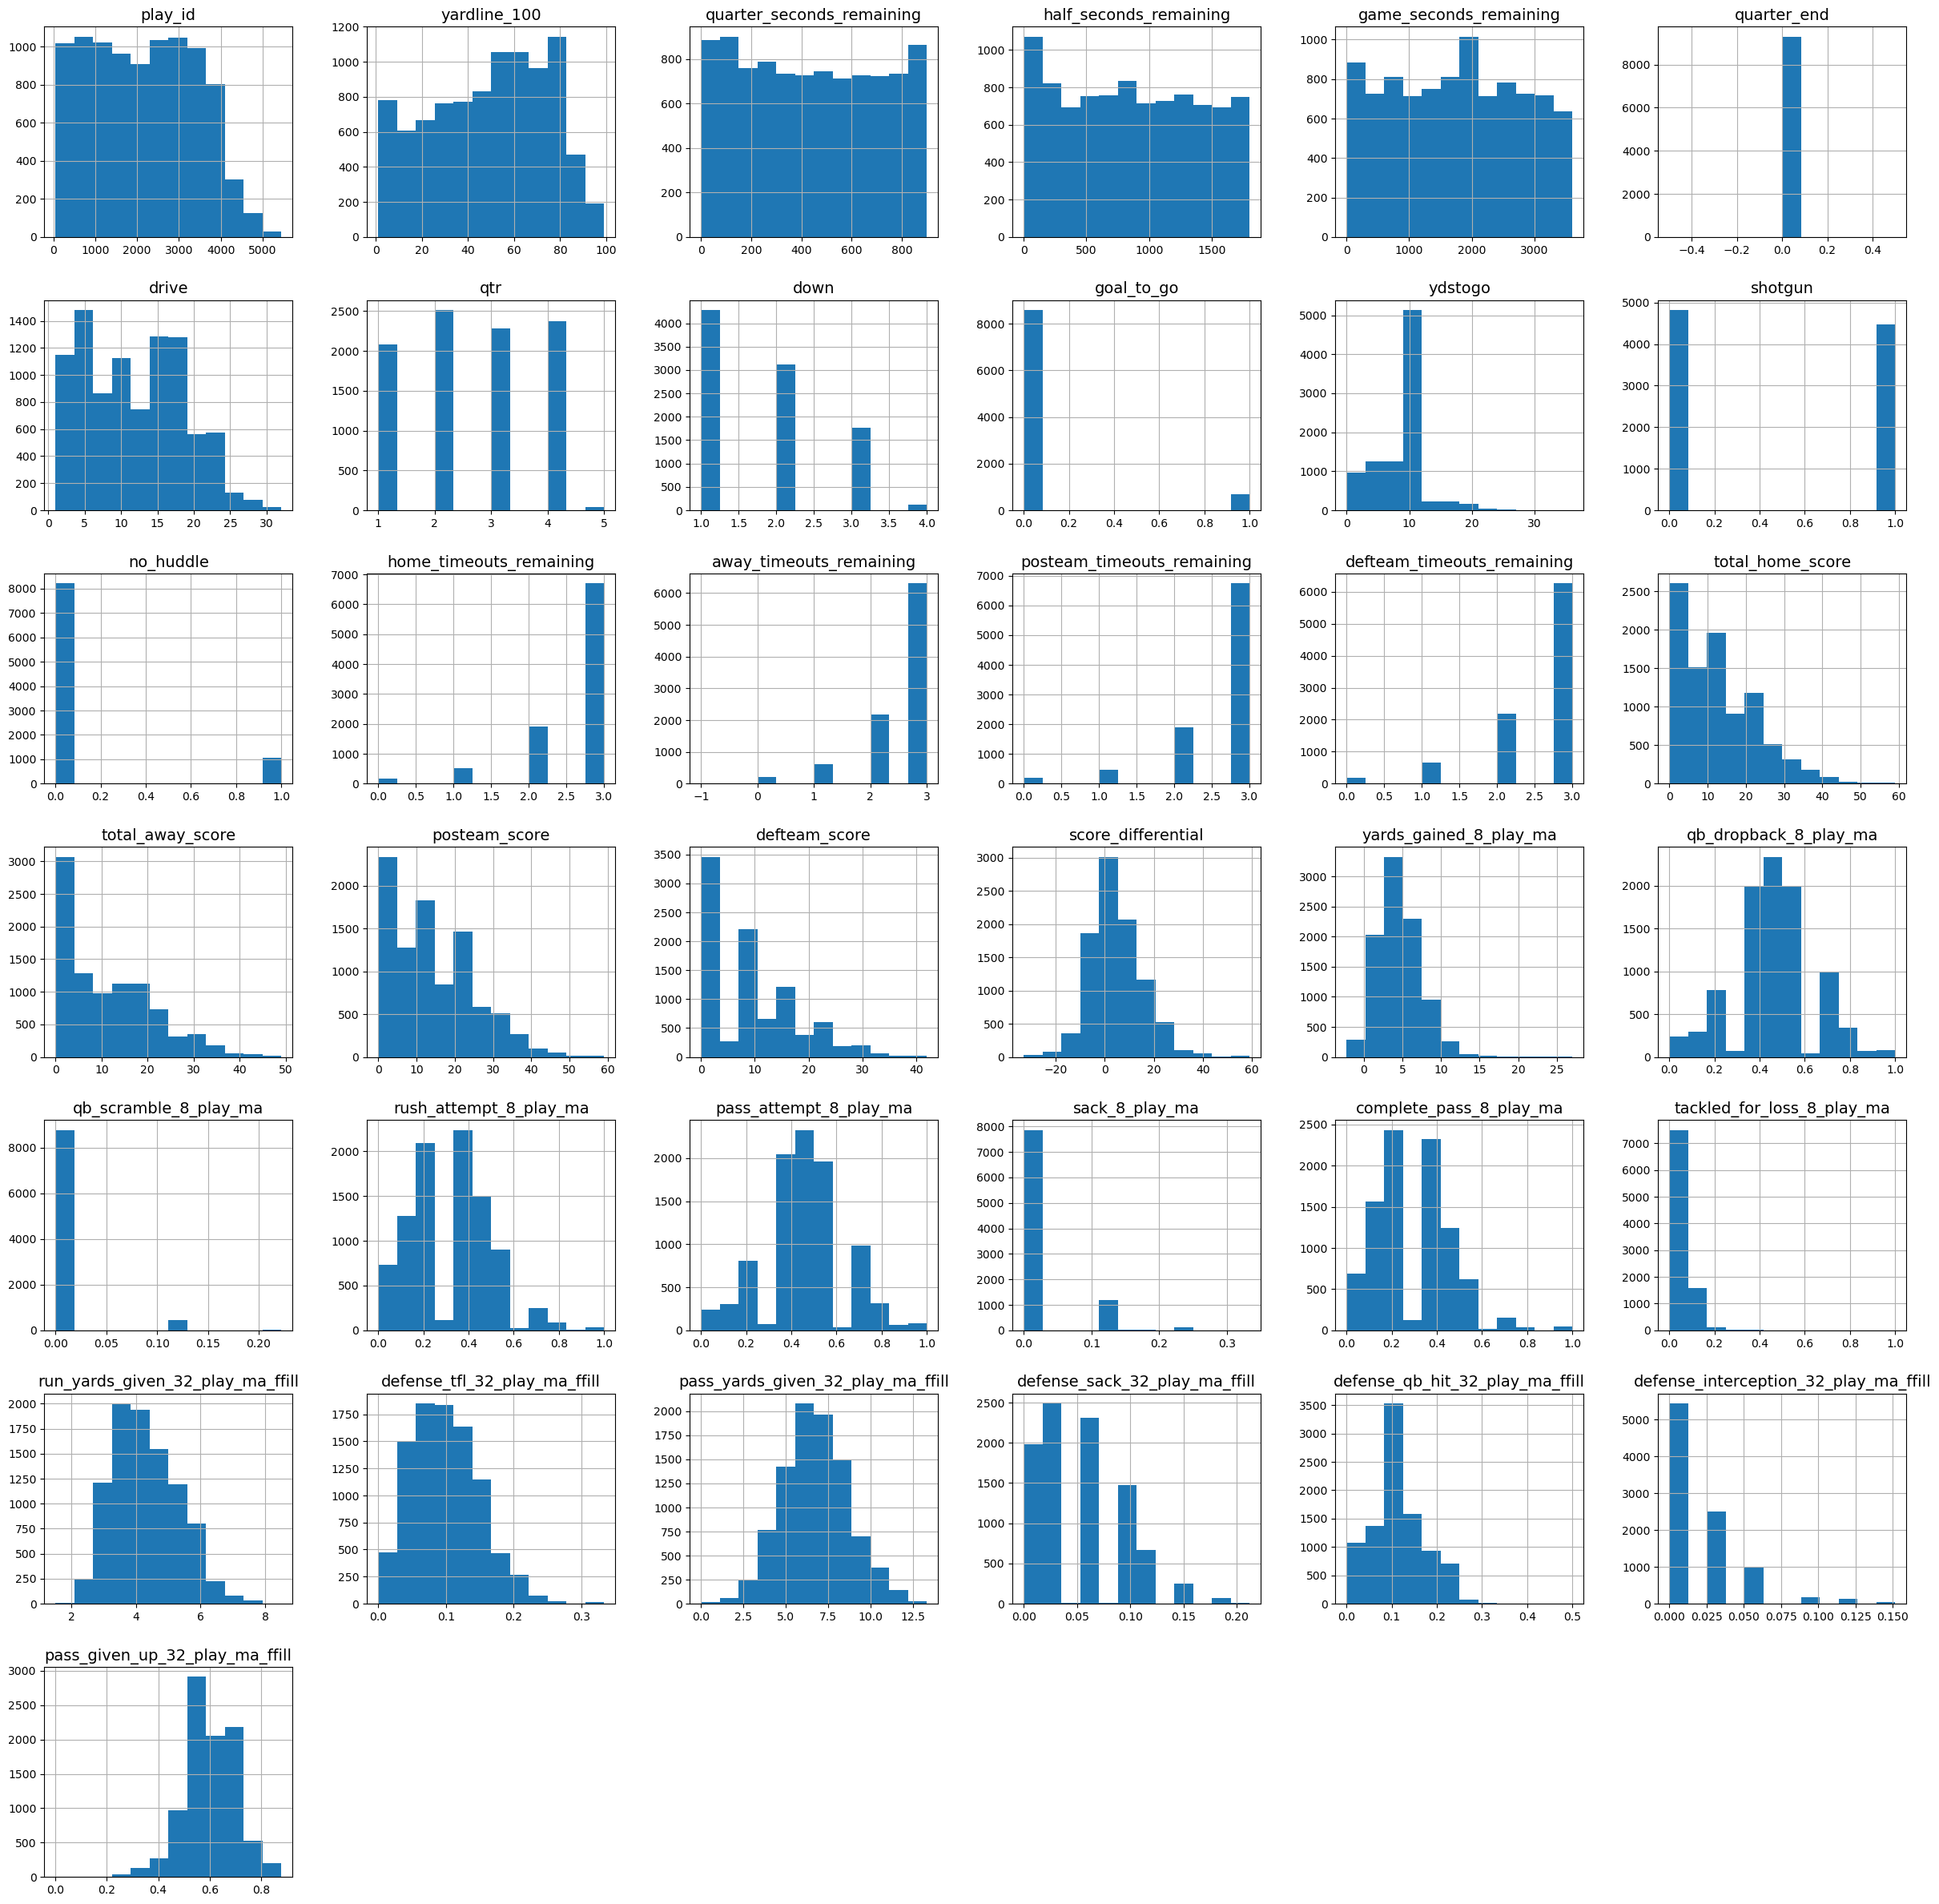

In [11]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=8)
plt.rc('axes', labelsize=10, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

nfl_df.hist(bins=12, figsize=(30, 30))
plt.show()

# Explore and Visualize

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


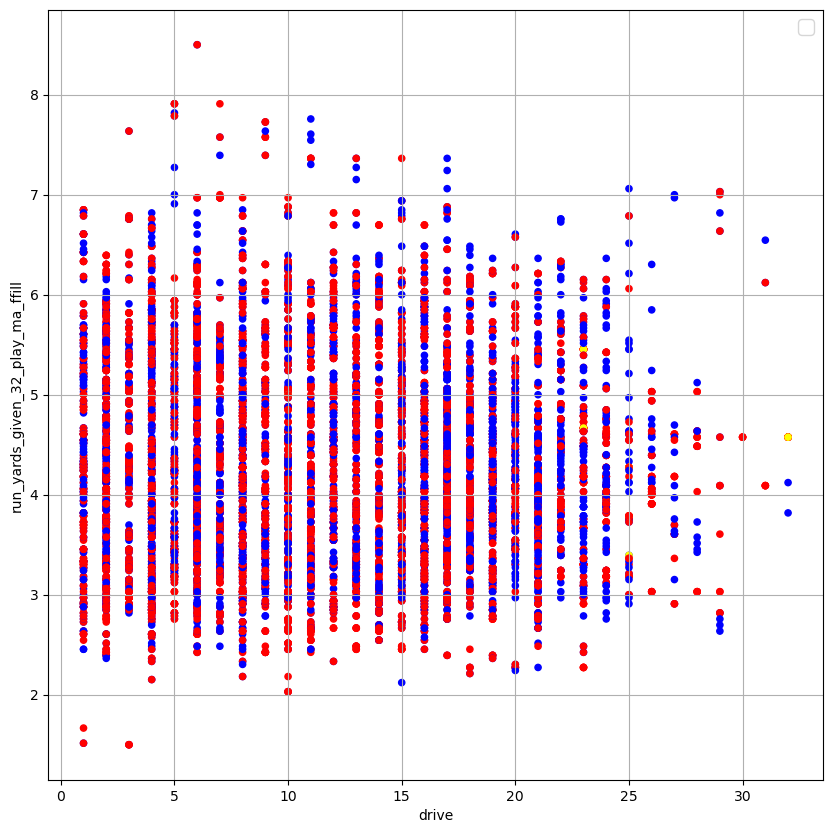

In [12]:
# Scatterplots

# yardline_100 vs. game_seconds_remaining, with the color representing the play_type

play_type_colors = { 'pass': 'red', 'run': 'blue', 'qb_spike': 'yellow' }

nfl_df\
.plot(kind='scatter',
             x='drive',
             y='run_yards_given_32_play_ma_ffill',
             grid=True,
             c=nfl_df['play_type'].apply(lambda x: play_type_colors[x]),
             figsize=(10, 10))

plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


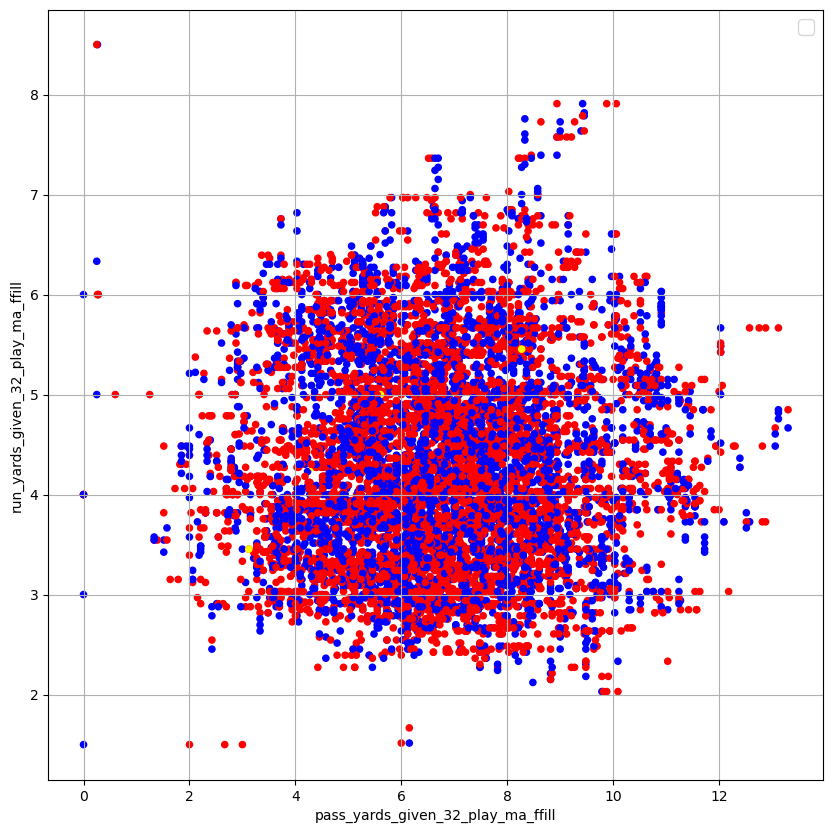

In [13]:
# Scatterplots

# yardline_100 vs. game_seconds_remaining, with the color representing the play_type

play_type_colors = { 'pass': 'red', 'run': 'blue', 'qb_spike': 'yellow' }

nfl_df\
.plot(kind='scatter',
             x='pass_yards_given_32_play_ma_ffill',
             y='run_yards_given_32_play_ma_ffill',
             grid=True,
             c=nfl_df['play_type'].apply(lambda x: play_type_colors[x]),
             figsize=(10, 10))

plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


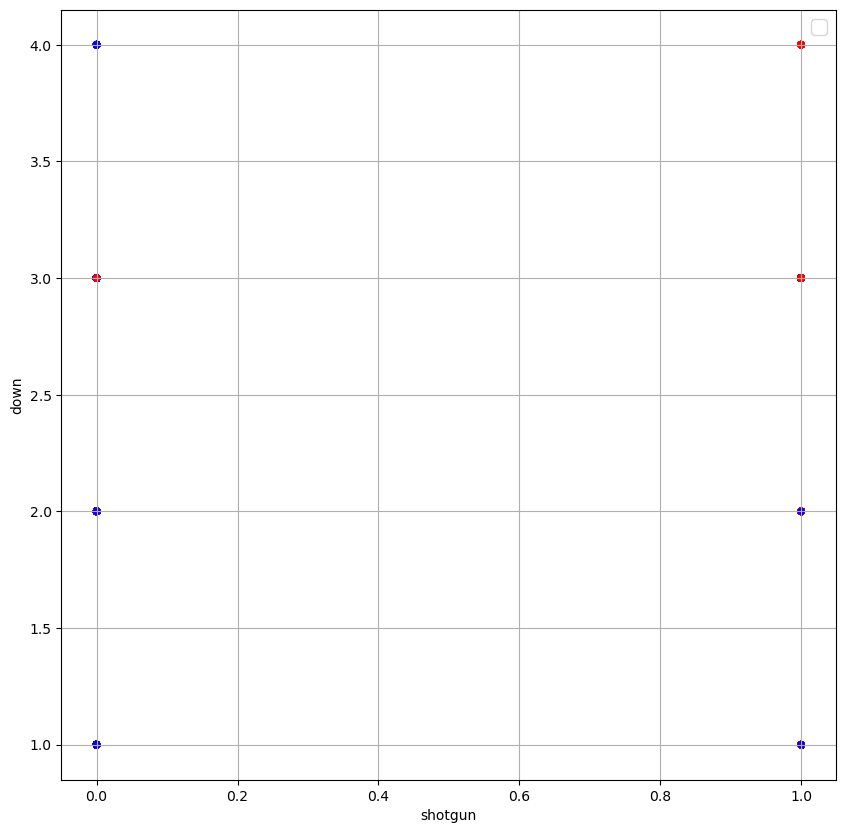

In [14]:
# Scatterplots

# yardline_100 vs. game_seconds_remaining, with the color representing the play_type

play_type_colors = { 'pass': 'red', 'run': 'blue', 'qb_spike': 'yellow' }

nfl_df\
.plot(kind='scatter',
             x='shotgun', 
             y='down',
             grid=True,
             c=nfl_df['play_type'].apply(lambda x: play_type_colors[x]),
             figsize=(10, 10))

plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


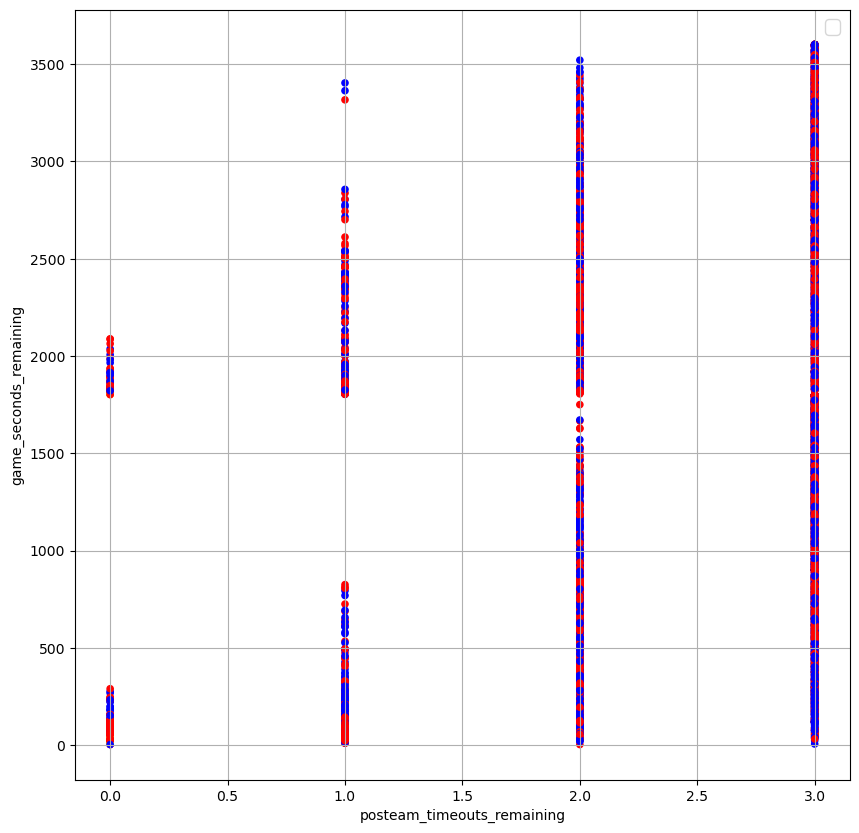

In [15]:
# Scatterplots

# yardline_100 vs. game_seconds_remaining, with the color representing the play_type

play_type_colors = { 'pass': 'red', 'run': 'blue', 'qb_spike': 'yellow' }

nfl_df\
.plot(kind='scatter',
             x='posteam_timeouts_remaining', 
             y='game_seconds_remaining',
             grid=True,
             c=nfl_df['play_type'].apply(lambda x: play_type_colors[x]),
             figsize=(10, 10))

plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


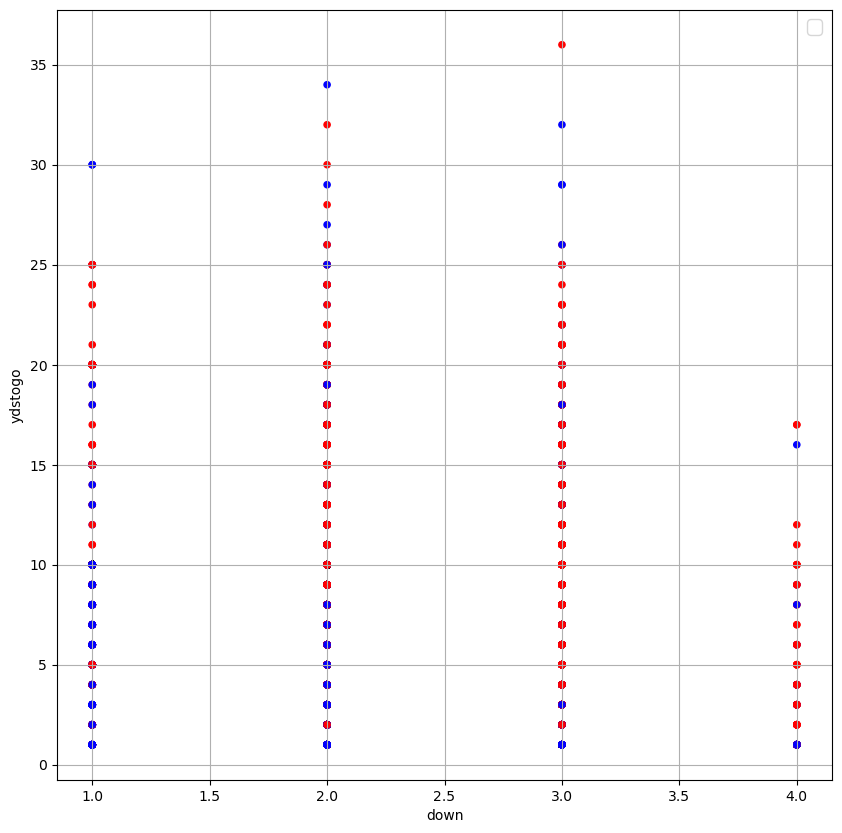

In [16]:
# Scatterplots

# yardline_100 vs. game_seconds_remaining, with the color representing the play_type

play_type_colors = { 'pass': 'red', 'run': 'blue', 'qb_spike': 'yellow' }

nfl_df\
.plot(kind='scatter',
             x='down', 
             y='ydstogo',
             grid=True,
             c=nfl_df['play_type'].apply(lambda x: play_type_colors[x]),
             figsize=(10, 10))

plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


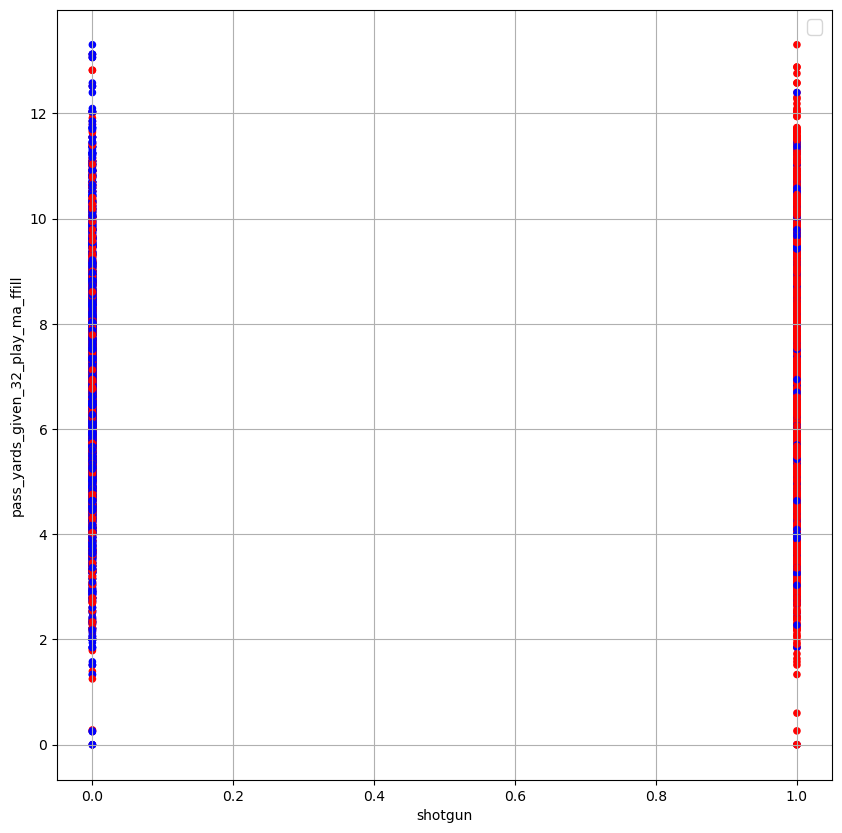

In [17]:
# Scatterplots

# yardline_100 vs. game_seconds_remaining, with the color representing the play_type

play_type_colors = { 'pass': 'red', 'run': 'blue', 'qb_spike': 'yellow' }

nfl_df\
.plot(kind='scatter',
             x='shotgun', 
             y='pass_yards_given_32_play_ma_ffill',
             grid=True,
             c=nfl_df['play_type'].apply(lambda x: play_type_colors[x]),
             figsize=(10, 10))

plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


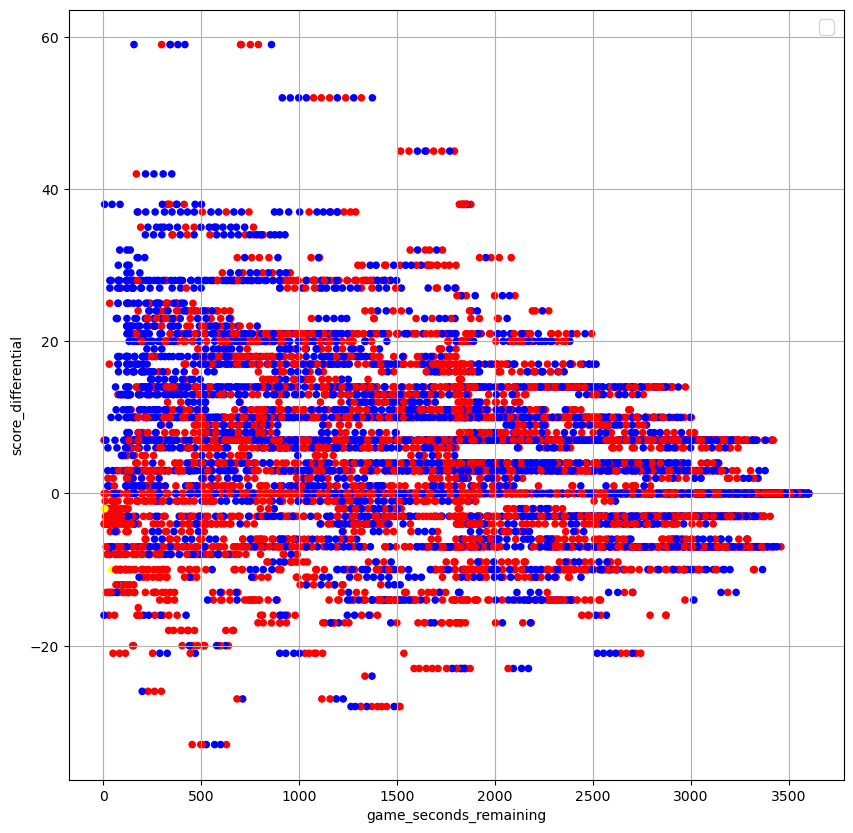

In [18]:
# Scatterplots

# yardline_100 vs. game_seconds_remaining, with the color representing the play_type

play_type_colors = { 'pass': 'red', 'run': 'blue', 'qb_spike': 'yellow' }

nfl_df\
.plot(kind='scatter',
             x='game_seconds_remaining', 
             y='score_differential',
             grid=True,
             c=nfl_df['play_type'].apply(lambda x: play_type_colors[x]),
             figsize=(10, 10))

plt.legend()

In [19]:
# Explore correlations
corr_matrix = pd.get_dummies(nfl_df, columns=["play_type"]).corr(numeric_only=True)

In [20]:
# Useful fields appear to be:
# score_differential
# rush_attempt_8_play_ma
# posteam_score
# goal_to_go
# yards_gained_8_play_ma
# defteam_score
# qb_dropback_8_play_ma
# pass_attempt_8_play_ma
# yardline_100
# ydstogo
# down
# shotgun

corr_matrix['play_type_run'].sort_values(ascending=False)

play_type_run                            1.000000
score_differential                       0.116595
rush_attempt_8_play_ma                   0.089817
posteam_score                            0.073227
goal_to_go                               0.072194
yards_gained_8_play_ma                   0.062899
run_yards_given_32_play_ma_ffill         0.041063
posteam_timeouts_remaining               0.038557
total_home_score                         0.029717
qtr                                      0.025559
pass_yards_given_32_play_ma_ffill        0.024083
drive                                    0.023738
play_id                                  0.022925
home_timeouts_remaining                  0.019607
away_timeouts_remaining                  0.006394
defense_interception_32_play_ma_ffill    0.005133
total_away_score                         0.003891
pass_given_up_32_play_ma_ffill          -0.003235
half_seconds_remaining                  -0.003241
qb_scramble_8_play_ma                   -0.003501


In [21]:
# Useful fields appear to be:
# shotgun
# down
# ydstogo
# yardline_100
# pass_attempt_8_play_ma
# qb_dropback_8_play_ma
# score_differential
# rush_attempt_8_play_ma
# posteam_score
# goal_to_go
# yards_gained_8_play_ma

corr_matrix['play_type_pass'].sort_values(ascending=False)

play_type_pass                           1.000000
shotgun                                  0.519876
down                                     0.172488
ydstogo                                  0.121132
yardline_100                             0.108596
pass_attempt_8_play_ma                   0.074016
qb_dropback_8_play_ma                    0.073967
defteam_score                            0.046053
tackled_for_loss_8_play_ma               0.032374
defense_tfl_32_play_ma_ffill             0.031287
game_seconds_remaining                   0.030445
no_huddle                                0.021739
defense_qb_hit_32_play_ma_ffill          0.017041
defteam_timeouts_remaining               0.016105
complete_pass_8_play_ma                  0.011787
sack_8_play_ma                           0.008298
quarter_seconds_remaining                0.007321
half_seconds_remaining                   0.006998
pass_given_up_32_play_ma_ffill           0.004102
defense_sack_32_play_ma_ffill            0.004063


In [22]:
# Useful fields appear to be:
# posteam_timeouts_remaining
# half_seconds_remaining
# game_seconds_remaining
# pass_attempt_8_play_ma
# qb_dropback_8_play_ma
corr_matrix['play_type_qb_spike'].sort_values(ascending=False)

play_type_qb_spike                       1.000000
defteam_score                            0.059857
pass_attempt_8_play_ma                   0.055079
qb_dropback_8_play_ma                    0.054418
drive                                    0.049927
play_id                                  0.048369
total_away_score                         0.044954
complete_pass_8_play_ma                  0.038430
qtr                                      0.028185
total_home_score                         0.026680
posteam_score                            0.020672
defense_sack_32_play_ma_ffill            0.013624
yards_gained_8_play_ma                   0.011689
no_huddle                                0.007120
defense_qb_hit_32_play_ma_ffill          0.006710
qb_scramble_8_play_ma                    0.005556
goal_to_go                               0.001957
ydstogo                                  0.000046
defense_interception_32_play_ma_ffill   -0.002769
run_yards_given_32_play_ma_ffill        -0.002822


In [23]:
# Attribute combinations
copy_df = nfl_df.copy()

In [24]:
copy_df["half_seconds_elapsed"] = 1800 - copy_df["half_seconds_remaining"]
copy_df["game_seconds_elapsed"] = 3600 - copy_df["game_seconds_remaining"]
copy_df["def_team_score_per_drive"] = copy_df["defteam_score"] / copy_df["drive"]
copy_df['rush_attempt_8_play_drive_ma'] = copy_df['rush_attempt_8_play_ma'] * copy_df['drive']
copy_df['run_yards_given_32_play_ma_per_ydstogo'] = copy_df['run_yards_given_32_play_ma_ffill'] / copy_df['ydstogo']
copy_df['pass_yards_given_32_play_ma_ydstogo'] = copy_df['pass_yards_given_32_play_ma_ffill'] * copy_df['ydstogo']
copy_df['posteam_timeouts_remaining_score_diff'] = copy_df['posteam_timeouts_remaining'] * copy_df['score_differential']
copy_df['ydstogo_down'] = copy_df['ydstogo'] * copy_df['down']
copy_df['pass_success_8_play_ma'] = copy_df['complete_pass_8_play_ma'] / copy_df['pass_attempt_8_play_ma']


In [25]:
corr_matrix_2 = pd.get_dummies(copy_df, columns=["play_type"]).corr(numeric_only=True)

In [26]:
corr_matrix_2['play_type_run'].sort_values(ascending=False)

play_type_run                             1.000000
run_yards_given_32_play_ma_per_ydstogo    0.180761
rush_attempt_8_play_drive_ma              0.118553
score_differential                        0.116595
posteam_timeouts_remaining_score_diff     0.101157
rush_attempt_8_play_ma                    0.089817
posteam_score                             0.073227
goal_to_go                                0.072194
yards_gained_8_play_ma                    0.062899
pass_success_8_play_ma                    0.054740
run_yards_given_32_play_ma_ffill          0.041063
posteam_timeouts_remaining                0.038557
total_home_score                          0.029717
game_seconds_elapsed                      0.027554
qtr                                       0.025559
pass_yards_given_32_play_ma_ffill         0.024083
drive                                     0.023738
play_id                                   0.022925
home_timeouts_remaining                   0.019607
away_timeouts_remaining        

In [27]:
corr_matrix_2['play_type_pass'].sort_values(ascending=False)

play_type_pass                            1.000000
shotgun                                   0.519876
ydstogo_down                              0.241645
down                                      0.172488
ydstogo                                   0.121132
yardline_100                              0.108596
pass_yards_given_32_play_ma_ydstogo       0.091810
pass_attempt_8_play_ma                    0.074016
qb_dropback_8_play_ma                     0.073967
def_team_score_per_drive                  0.050800
defteam_score                             0.046053
tackled_for_loss_8_play_ma                0.032374
defense_tfl_32_play_ma_ffill              0.031287
game_seconds_remaining                    0.030445
no_huddle                                 0.021739
defense_qb_hit_32_play_ma_ffill           0.017041
defteam_timeouts_remaining                0.016105
complete_pass_8_play_ma                   0.011787
sack_8_play_ma                            0.008298
quarter_seconds_remaining      

# Train a local Model

0   play_id                                9294 non-null   int32  
 1   game_date                              9294 non-null   object 
 2   home_team                              9294 non-null   object 
 3   away_team                              9294 non-null   object 
 4   posteam                                9294 non-null   object 
 5   posteam_type                           9294 non-null   object 
 6   defteam                                9294 non-null   object 
 7   side_of_field                          9294 non-null   object 
 8   yardline_100                           9294 non-null   int32  
 9   quarter_seconds_remaining              9294 non-null   int32  
 10  half_seconds_remaining                 9286 non-null   float64
 11  game_seconds_remaining                 9289 non-null   float64
 12  game_half                              9294 non-null   object 
 13  quarter_end                            9294 non-null   int32  
 14  drive                                  9294 non-null   int32  
 15  qtr                                    9294 non-null   int32  
 16  down                                   9281 non-null   float64
 17  goal_to_go                             9294 non-null   int32  
 18  time                                   9294 non-null   object 
 19  ydstogo                                9294 non-null   int32  
 20  play_type                              9294 non-null   object 
 21  shotgun                                9294 non-null   int32  
 22  no_huddle                              9294 non-null   int32  
 23  home_timeouts_remaining                9294 non-null   int32  
 24  away_timeouts_remaining                9294 non-null   int32  
 25  posteam_timeouts_remaining             9294 non-null   int32  
 26  defteam_timeouts_remaining             9294 non-null   int32  
 27  total_home_score                       9294 non-null   int32  
 28  total_away_score                       9294 non-null   int32  
 29  posteam_score                          9294 non-null   int32  
 30  defteam_score                          9294 non-null   int32  
 31  score_differential                     9294 non-null   int32  
 32  yards_gained_8_play_ma                 9233 non-null   float64
 33  qb_dropback_8_play_ma                  9233 non-null   float64
 34  qb_scramble_8_play_ma                  9233 non-null   float64
 35  rush_attempt_8_play_ma                 9233 non-null   float64
 36  pass_attempt_8_play_ma                 9233 non-null   float64
 37  sack_8_play_ma                         9233 non-null   float64
 38  complete_pass_8_play_ma                9233 non-null   float64
 39  tackled_for_loss_8_play_ma             9233 non-null   float64
 40  run_yards_given_32_play_ma_ffill       9291 non-null   float64
 41  defense_tfl_32_play_ma_ffill           9291 non-null   float64
 42  pass_yards_given_32_play_ma_ffill      9292 non-null   float64
 43  defense_sack_32_play_ma_ffill          9292 non-null   float64
 44  defense_qb_hit_32_play_ma_ffill        9292 non-null   float64
 45  defense_interception_32_play_ma_ffill  9292 non-null   float64
 46  pass_given_up_32_play_ma_ffill         9292 non-null   float64
 47  game_month                             9294 non-null   object 

In [28]:
from sklearn.model_selection import train_test_split 

pre_snap_features = ["shotgun", 
                    #  "down", 
                    # "ydstogo",
                     "ydstogo_down",
                       "yardline_100",
                    #  "run_yards_given_32_play_ma_per_ydstogo",
                     "rush_attempt_8_play_drive_ma",
                     "score_differential", 
                    #  "posteam_timeouts_remaining_score_diff"
                     ]
play_label = ["play_type"]

X = copy_df[pre_snap_features].values
y = copy_df[play_label].values


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

print("Training size: %d, Testing size: %d" % (len(X_train), len(X_test)))

Training size: 7435, Testing size: 1859


## Configure MLFlow AutoLogging

In [29]:
import mlflow
# Set Tracking URI to point to Docker container
host = "mlflow_tracking_server"
port = 5000
mlflow.set_tracking_uri(uri=f"http://{host}:{port}")

# Set Experiment
experiment_name = "NFL-Play-Prediction-Experiment"
mlflow.set_experiment(experiment_name)

# Set up Autologging
mlflow.autolog()

2024/06/21 18:02:42 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2024/06/21 18:02:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/06/21 18:02:43 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2024/06/21 18:02:43 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during spark autologging: Exception while attempting to initialize JVM-side state for Spark datasource autologging. Note that Spark datasource autologging only works with Spark 3.0 and above. Please create a new Spark session with required Spark version and ensure you have the mlflow-spark JAR attached to your Spark session as described in https://mlflow.org/docs/latest/tracking/autolog.html#spark Exception:


In [30]:
from sklearn.ensemble import RandomForestClassifier

with mlflow.start_run(run_name="Decision Tree Classification Run") as run:
    # tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
    tree_clf = RandomForestClassifier(random_state=42)
    tree_reg_model = tree_clf.fit(X_train, y_train)

    run_id = run.info.run_id

    print(f"Run ID: {run_id}")


2024/06/21 18:02:43 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during spark autologging: Exception while attempting to initialize JVM-side state for Spark datasource autologging. Note that Spark datasource autologging only works with Spark 3.0 and above. Please create a new Spark session with required Spark version and ensure you have the mlflow-spark JAR attached to your Spark session as described in https://mlflow.org/docs/latest/tracking/autolog.html#spark Exception:
'JavaPackage' object is not callable
2024/06/21 18:02:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during spark autologging: Exception while attempting to initialize JVM-side state for Spark datasource autologging. Note that Spark datasource autologging only works with Spark 3.0 and above. Please create a new Spark session with required Spark version and ensure you have the mlflow-spark JAR attached to your Spark session as described in https://mlflow.org/docs/latest/

Run ID: 3a148e752b54453e98b625f63d1809d1


2024/06/21 18:05:08 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during spark autologging: Exception while attempting to initialize JVM-side state for Spark datasource autologging. Note that Spark datasource autologging only works with Spark 3.0 and above. Please create a new Spark session with required Spark version and ensure you have the mlflow-spark JAR attached to your Spark session as described in https://mlflow.org/docs/latest/tracking/autolog.html#spark Exception:
'JavaPackage' object is not callable


In [31]:
# from sklearn import tree

# tree.plot_tree(tree_reg_model.estimators_[0], filled=True)

[Text(0.6190957847972505, 0.9861111111111112, 'x[0] <= 0.5\ngini = 0.492\nsamples = 4703\nvalue = [4228, 14, 3193]'),
 Text(0.40956376772290154, 0.9583333333333334, 'x[1] <= 13.5\ngini = 0.439\nsamples = 2470\nvalue = [1230, 14, 2626]'),
 Text(0.514329776260076, 0.9722222222222223, 'True  '),
 Text(0.25367328266634054, 0.9305555555555556, 'x[2] <= 25.5\ngini = 0.411\nsamples = 2017\nvalue = [895.0, 14.0, 2269.0]'),
 Text(0.08010170696800294, 0.9027777777777778, 'x[3] <= 9.389\ngini = 0.281\nsamples = 498\nvalue = [121, 4, 620]'),
 Text(0.0638267993677675, 0.875, 'x[1] <= 11.0\ngini = 0.299\nsamples = 443\nvalue = [116.0, 4.0, 543.0]'),
 Text(0.038543474948235214, 0.8472222222222222, 'x[1] <= 3.5\ngini = 0.287\nsamples = 428\nvalue = [105, 4, 525]'),
 Text(0.013911505376665361, 0.8194444444444444, 'x[2] <= 2.5\ngini = 0.216\nsamples = 119\nvalue = [22, 0, 157]'),
 Text(0.008700666592965966, 0.7916666666666666, 'x[1] <= 1.5\ngini = 0.289\nsamples = 77\nvalue = [20, 0, 94]'),
 Text(0.0022